In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("./train.csv/train.csv", parse_dates=['timestamp'])
test = pd.read_csv("./test.csv/test.csv", parse_dates=['timestamp'])
macro = pd.read_csv("./macro.csv", parse_dates=['timestamp'])

In [3]:
train = train[train.price_doc/train.full_sq <= 600000]
train = train[train.price_doc/train.full_sq >= 10000]

In [4]:
for c in train.columns:
    print c

id
timestamp
full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
product_type
sub_area
area_m
raion_popul
green_zone_part
indust_part
children_preschool
preschool_quota
preschool_education_centers_raion
children_school
school_quota
school_education_centers_raion
school_education_centers_top_20_raion
hospital_beds_raion
healthcare_centers_raion
university_top_20_raion
sport_objects_raion
additional_education_raion
culture_objects_top_25
culture_objects_top_25_raion
shopping_centers_raion
office_raion
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
full_all
male_f
female_f
young_all
young_male
young_female
work_all
work_male
work_female
ekder_all
ekder_male
ekder_female
0_6_all
0_6_male
0_6_female
7_14_all
7_14_male
7_14_female
0_17_all
0_17_male
0_17_female
16_29_all
16_29_male
16_29_female
0_13_all
0_13_male
0_13_female
raion_build_count_with_

In [5]:
from collections import Counter

counter = Counter(train["sub_area"])

words,cnts = [],[]
for word, cnt in counter.most_common():
    words.append(word)
    cnts.append(cnt)
sa = pd.DataFrame({"sub_area":words,"count":cnts})
sa.head(20)

,count,sub_area
0,1776,Poselenie Sosenskoe
1,1599,Nekrasovka
2,1370,Poselenie Vnukovskoe
3,924,Poselenie Moskovskij
4,708,Poselenie Voskresenskoe
5,676,Tverskoe
6,676,Mitino
7,517,Krjukovo
8,507,Mar'ino
9,496,Poselenie Filimonkovskoe


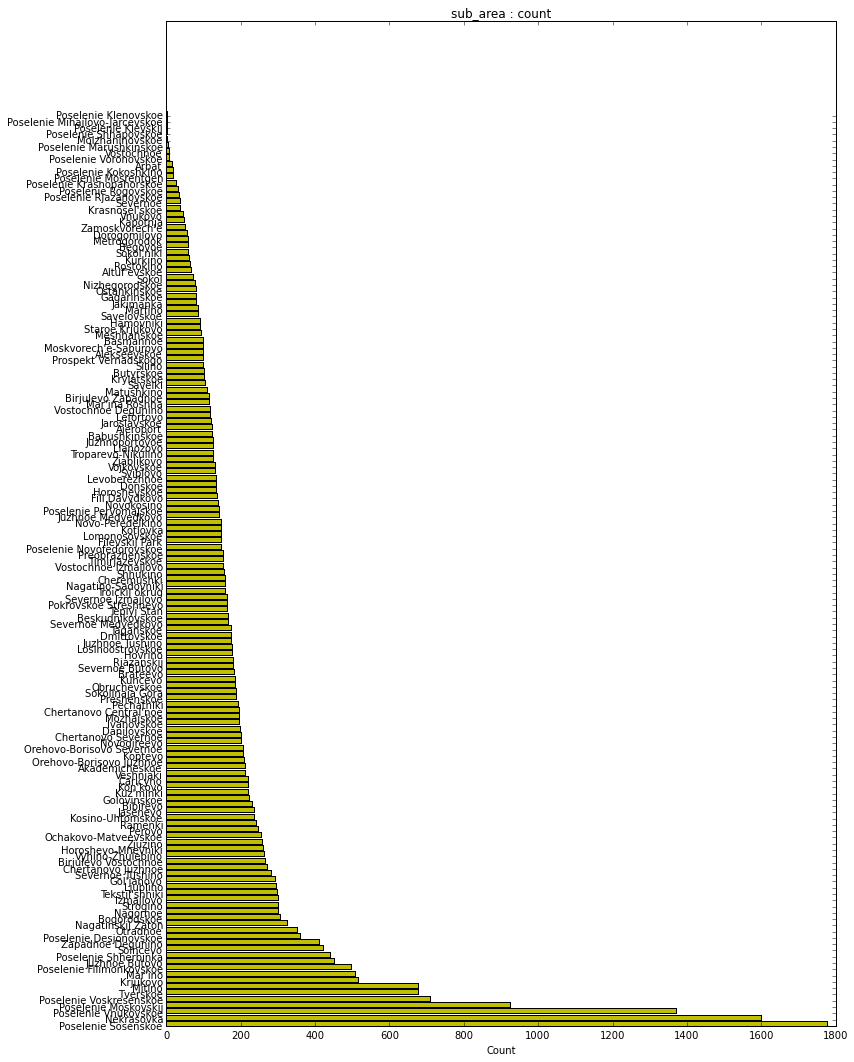

In [6]:
ind = np.arange(sa.shape[0])
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, sa["count"].values, color='y')
ax.set_yticks(ind)
ax.set_yticklabels(sa["sub_area"].values, rotation='horizontal')
ax.set_xlabel("Count")
ax.set_title("sub_area : count")
plt.show()


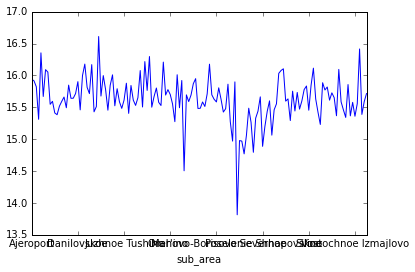

In [7]:
train["log_price"] = np.log(train["price_doc"])
df1 = train.groupby("sub_area")["log_price"].mean()
df1.plot()

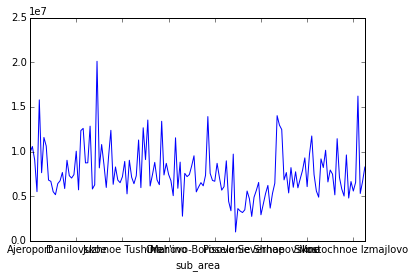

In [8]:
df2 = train.groupby("sub_area")["price_doc"].mean()
df2.plot()

In [ ]:
df_test_kremlin_km = test['kremlin_km']

# =============================
# =============================
# cleanup
# brings error down a lot by removing extreme price per sqm
print(train.shape)
#train.loc[train.full_sq == 0, 'full_sq'] = 30
train = train[train.price_doc/train.full_sq <= 600000]
train = train[train.price_doc/train.full_sq >= 10000]
print(train.shape)
# =============================
# =============================

In [ ]:
x = np.linspace(0,len(train.full_sq.values),len(train.full_sq.values))
plt.scatter(x,train.full_sq.values)
plt.show()

In [ ]:
plt.scatter(np.log(train["full_sq"]),np.log(train["life_sq"]))
plt.show()

In [ ]:
print train["life_sq"].isnull().sum()
print train["life_sq"].isnull()
print train["life_sq"].mean()
print train["life_sq"].median()
x = np.linspace(0,len(train["life_sq"]),len(train["life_sq"]))
plt.ylim(0,1000)
plt.scatter(x,train["life_sq"])
plt.show()

In [ ]:
for c in train.columns:
    print c

In [ ]:
plt.scatter(train["floor"],train["material"])
plt.show()

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
 
ax.scatter3D(train["num_room"], train["max_floor"], train["floor"])
#plt.xlim(0,5)
#plt.scatter(train["build_year"],train["max_floor"])
plt.show()

In [ ]:
plt.scatter(train["state"],np.log(train["price_doc"]))
plt.show()

In [ ]:
df= pd.DataFrame({"build_count_mix":train["build_count_mix"],"build_count_before_1920":train["build_count_before_1920"],"build_count_after_1995":train["build_count_after_1995"],"build_year":train["build_year"],"timestamp":train["timestamp"]})
print df

In [ ]:
y_train = df_train['price_doc'].values
id_test = df_test['id']

df_train.drop(['id', 'price_doc'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

# Build df_all = (df_train+df_test).join(df_macro)
num_train = len(df_train)
df_all = pd.concat([df_train, df_test])
df_all = df_all.join(df_macro, on='timestamp', rsuffix='_macro')
print(df_all.shape)


# ==============================
# Add month-year
month_year = (df_all.timestamp.dt.month + df_all.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
df_all['month'] = df_all.timestamp.dt.month
df_all['dow'] = df_all.timestamp.dt.dayofweek

# Other feature engineering
df_all['rel_floor'] = df_all['floor'] / df_all['max_floor'].astype(float)
df_all['rel_kitch_sq'] = df_all['kitch_sq'] / df_all['full_sq'].astype(float)

# Remove timestamp column (may overfit the model in train)
df_all.drop(['timestamp', 'timestamp_macro'], axis=1, inplace=True)

factorize = lambda t: pd.factorize(t[1])[0]

df_obj = df_all.select_dtypes(include=['object'])

X_all = np.c_[
    df_all.select_dtypes(exclude=['object']).values,
    np.array(list(map(factorize, df_obj.iteritems()))).T
]
print(X_all.shape)

X_train = X_all[:num_train]
X_test = X_all[num_train:]


# Deal with categorical values
df_numeric = df_all.select_dtypes(exclude=['object'])
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

df_values = pd.concat([df_numeric, df_obj], axis=1)


# Convert to numpy values
X_all = df_values.values
print(X_all.shape)

X_train = X_all[:num_train]
X_test = X_all[num_train:]

df_columns = df_values.columns


xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(X_train, y_train, feature_names=df_columns)
dtest = xgb.DMatrix(X_test, feature_names=df_columns)


# Uncomment to tune XGB `num_boost_rounds`

#cv_result = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
#    verbose_eval=True, show_stdv=False)
#cv_result[['train-rmse-mean', 'test-rmse-mean']].plot()
#num_boost_rounds = len(cv_result)

num_boost_round = 489

model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_round)

fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

y_pred = model.predict(dtest)

# depending on kremlin_km, we adjust prices
#df_test_kremlin_km
#y_pred = np.round(y_pred * 0.98)


df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

df_sub.to_csv('sub.csv', index=False)